Possible data sets:
https://www.kaggle.com/datasets/abdulszz/spotify-most-streamed-songs



Analysis that can be done on dataset
by Joshua Au-Yeung & Haichen Zhang​

​
*   Analyze trends in popular music over time.
*   Study the correlation between musical attributes and song popularity. - Joshua
*   Build machine learning models to predict song chart rankings based on various features. - Joshua
*   Compare streaming patterns across multiple platforms.



Features of the Dataset
Basic Track Information:

track_name: Name of the song.
artist(s)_name: Name of the artist(s) performing the song.
artist_count: Number of artists contributing to the song.
released_year, released_month, released_day: Release date details.
Streaming Metrics:

in_spotify_playlists: Number of Spotify playlists the song is featured in.
in_spotify_charts: Rank of the song on Spotify charts.
streams: Total number of streams on Spotify.
in_apple_playlists, in_apple_charts: Presence in Apple Music playlists and charts.
in_deezer_playlists, in_deezer_charts: Presence in Deezer playlists and charts.
in_shazam_charts: Rank on Shazam charts.
Musical Attributes:

bpm: Beats per minute, representing the tempo of the song.
key: Key of the song.
mode: Indicates whether the song is in a major or minor mode.
danceability_%: Suitability of the song for dancing.
valence_%: Positivity of the song’s musical content.
energy_%: Perceived energy level of the song.
acousticness_%: Acoustic sound presence in the song.
instrumentalness_%: Proportion of instrumental content in the track.
liveness_%: Presence of live performance elements.
speechiness_%: Amount of spoken words in the song.

Exploring the data:

In [ ]:
import kagglehub
import os
import pandas as pd

# Download the latest version of the dataset
path = kagglehub.dataset_download("abdulszz/spotify-most-streamed-songs")

# Specify the correct CSV file name
csv_file = os.path.join(path, 'Spotify Most Streamed Songs.csv')

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file)


print("Column names:", df.columns.tolist())

100%|██████████| 60.0k/60.0k [00:00<00:00, 37.8MB/s]

Extracting files...
Column names: ['track_name', 'artist(s)_name', 'artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'cover_url']


In [ ]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


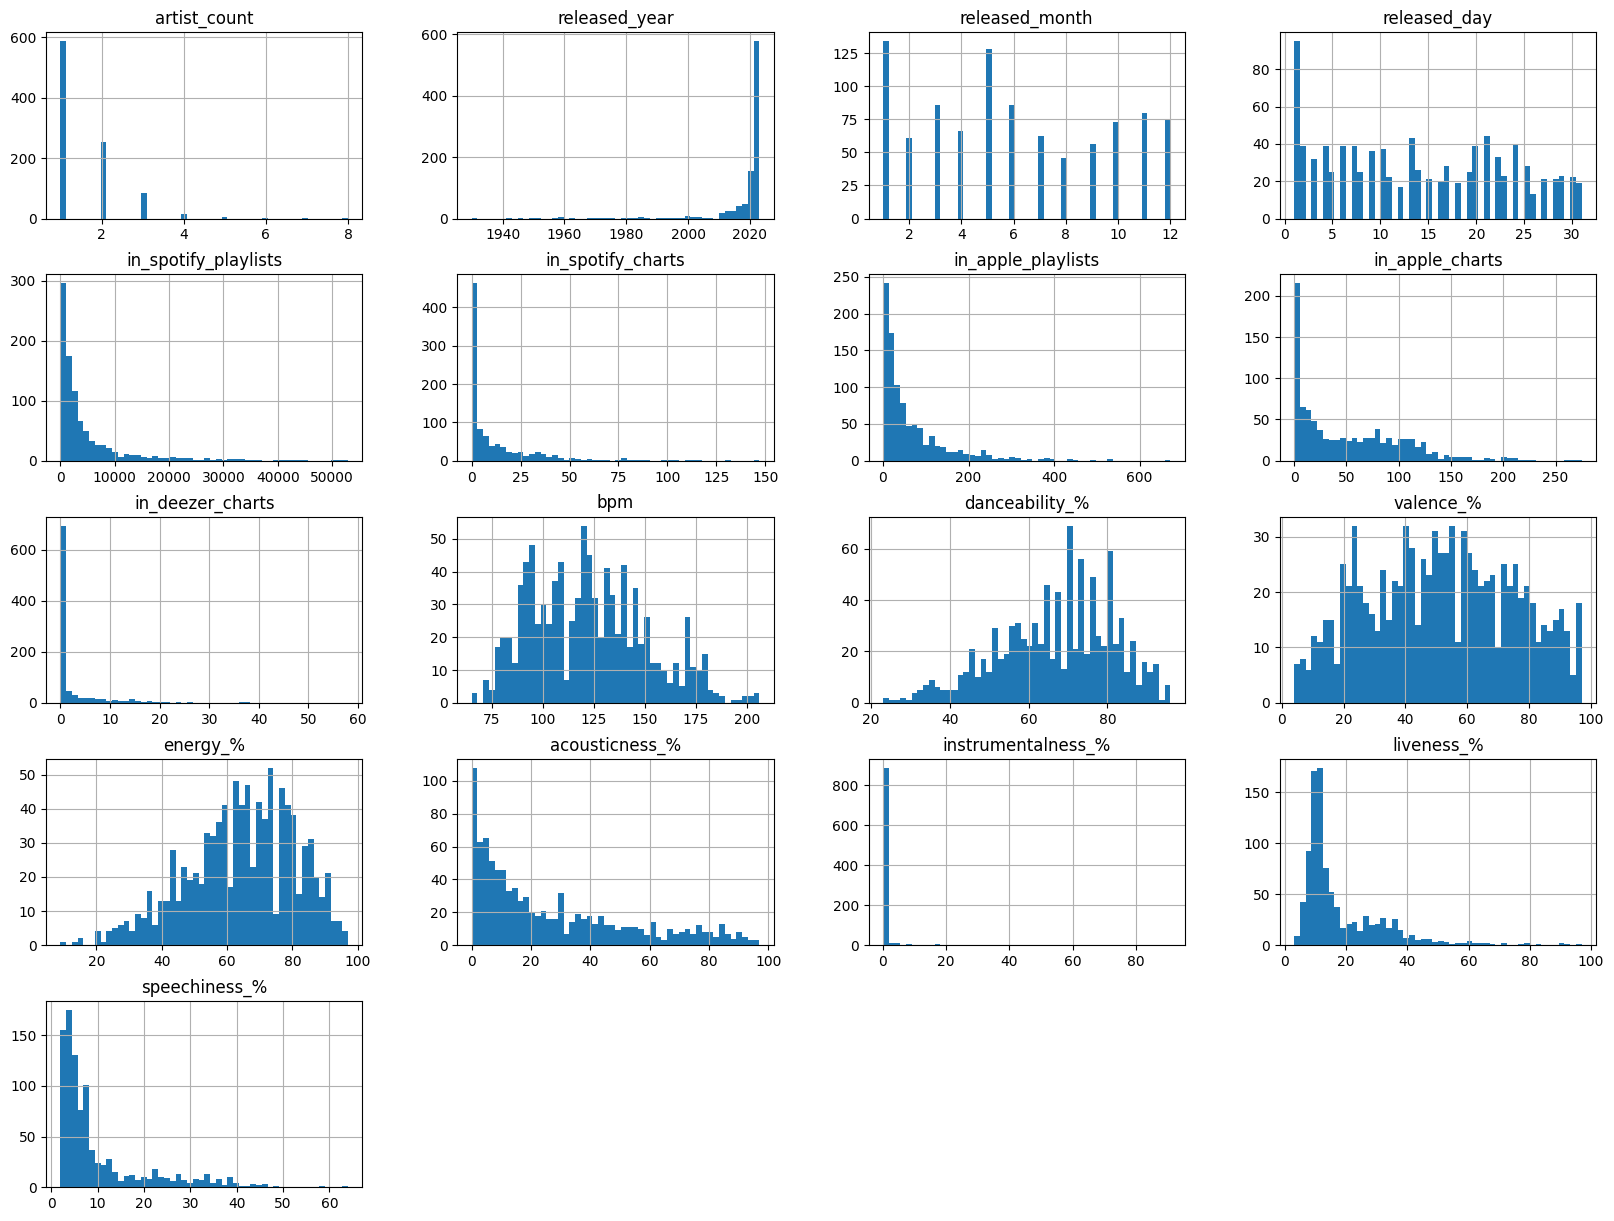

In [ ]:
df.hist(bins=50, figsize=(20,15));

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [ ]:
df['streams'].describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [ ]:
# Get unique values from the 'key' and 'mode' columns
unique_keys = df['key'].unique()
unique_modes = df['mode'].unique()

print("Unique values in 'key' column:", unique_keys)
print("Unique values in 'mode' column:", unique_modes)

# Get the unique types of the values in the 'streams' column
unique_stream_types = df['streams'].apply(type).unique()

print("Unique types in 'streams' column:", unique_stream_types)

Unique values in 'key' column: ['B' 'C#' 'F' 'A' 'D' 'F#' nan 'G#' 'G' 'E' 'A#' 'D#']
Unique values in 'mode' column: ['Major' 'Minor']
Unique types in 'streams' column: [<class 'str'>]


In [ ]:
# Get unique values and their counts from the 'key' column
key_counts = df['key'].value_counts()

# Get unique values and their counts from the 'mode' column
mode_counts = df['mode'].value_counts()

print("Unique values and counts in 'key' column:")
print(key_counts)

print("\nUnique values and counts in 'mode' column:")
print(mode_counts)

Unique values and counts in 'key' column:
key
C#    120
G      96
G#     91
F      89
B      81
D      81
A      75
F#     73
E      62
A#     57
D#     33
Name: count, dtype: int64

Unique values and counts in 'mode' column:
mode
Major    550
Minor    403
Name: count, dtype: int64


In [ ]:
# Count the number of songs in the key of C
songs_in_key_C = df[df['key'] == 'C']

# Get the count
count_in_key_C = len(songs_in_key_C)

print(f"Number of songs in the key of C: {count_in_key_C}")


Number of songs in the key of C: 0


In [ ]:
# Group by 'key' and 'mode', and count the number of songs
key_mode_counts = df.groupby(['key', 'mode']).size().reset_index(name='count')

print("Count of songs per key and mode:")
print(key_mode_counts)

Count of songs per key and mode:
   key   mode  count
0    A  Major     42
1    A  Minor     33
2   A#  Major     27
3   A#  Minor     30
4    B  Major     35
5    B  Minor     46
6   C#  Major     73
7   C#  Minor     47
8    D  Major     66
9    D  Minor     15
10  D#  Major     12
11  D#  Minor     21
12   E  Major     17
13   E  Minor     45
14   F  Major     44
15   F  Minor     45
16  F#  Major     30
17  F#  Minor     43
18   G  Major     66
19   G  Minor     30
20  G#  Major     63
21  G#  Minor     28


**Study the correlation between musical attributes and song popularity.**

There is a commonly held belief that key and mode may have an impact on the song's popularity, lets see if the data supports this theory.

Null hypothesis: there is no difference between key and mode on streams.
Alternative hypothesis: there is significant interaction effect between key and mode on streams.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ensure 'streams' column is numeric, and coerce any errors
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Filter relevant columns for analysis, drop rows with NaNs in 'streams'
df_anova = df[['streams', 'key', 'mode']].dropna(subset=['streams', 'key', 'mode'])

# Convert 'key' and 'mode' to categorical variables
df_anova['key'] = df_anova['key'].astype('category')
df_anova['mode'] = df_anova['mode'].astype('category')

# Define the two-way ANOVA model with interaction
model = ols('streams ~ C(key) * C(mode)', data=df_anova).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)  # Type II ANOVA
print(anova_table)

                      sum_sq     df         F    PR(>F)
C(key)          3.203675e+18   10.0  0.983726  0.455844
C(mode)         1.097300e+18    1.0  3.369389  0.066774
C(key):C(mode)  3.656775e+18   10.0  1.122855  0.341617
Residual        2.719324e+20  835.0       NaN       NaN


The key has a high p-value: 0.455844. The key has no significant effect on streams.
The mode has a p-value of 0.066774 indicating a slight influence on streams, but not at significance levels.
The interaction of key and mode has a p-value of 0.341617, which indicate that the combination of key and mode has no significant influence on streams.

These results are surprising to me. It is widely held belief amongst musicians that major keys (the major mode) dominates the majority of popular music. I would have expected the majority of most streamed songs to be of the major mode by such a wide margin that it would meet significance levels. It looks like there is some influence, but not at significance levels. So we cannot reject the null hypothesis.

In [ ]:
# Group by mode and calculate mean streams
mode_means = df_anova.groupby('mode')['streams'].mean().reset_index()
print(mode_means)


    mode       streams
0  Major  5.403524e+08
1  Minor  4.799439e+08


<ipython-input-11-d2b5261becaf>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mode_means = df_anova.groupby('mode')['streams'].mean().reset_index()


It looks like the major mode gets more streams than the minor mode.

Let's take a look at all of the musical attributes and see it's impact on song streams

null hypothesis: there is no significant effct of the musical attributes on the song streams.
Alternative hypothesis: at least one musical attribute group mean is significantly different or at least one musical attribute has a significant effect on streams.

In [ ]:
# Filter relevant columns for analysis, drop rows with NaNs
df_musical_attributes = df[['streams', 'bpm', 'key', 'mode',
                'danceability_%', 'valence_%', 'energy_%',
                'acousticness_%', 'instrumentalness_%',
                'liveness_%', 'speechiness_%']].dropna()

# Rename columns to remove special characters
df_musical_attributes.rename(columns={
    'danceability_%': 'danceability',
    'valence_%': 'valence',
    'energy_%': 'energy',
    'acousticness_%': 'acousticness',
    'instrumentalness_%': 'instrumentalness',
    'liveness_%': 'liveness',
    'speechiness_%': 'speechiness'
}, inplace=True)

# Convert categorical variables to category type
df_musical_attributes['key'] = df_musical_attributes['key'].astype('category')
df_musical_attributes['mode'] = df_musical_attributes['mode'].astype('category')

# Define the ANOVA model with renamed columns
formula = 'streams ~ bpm + C(key) + C(mode) + danceability + valence + energy + acousticness + instrumentalness + liveness + speechiness'
model = ols(formula, data=df_musical_attributes).fit()

anova_table = sm.stats.anova_lm(model, typ=2)  # Type II ANOVA
print(anova_table)

                        sum_sq     df         F    PR(>F)
C(key)            3.650400e+18   10.0  1.141047  0.328141
C(mode)           3.749990e+17    1.0  1.172177  0.279266
bpm               3.727565e+16    1.0  0.116517  0.732929
danceability      1.985236e+18    1.0  6.205477  0.012928
valence           2.811917e+16    1.0  0.087895  0.766944
energy            2.690051e+17    1.0  0.840860  0.359415
acousticness      2.169983e+17    1.0  0.678296  0.410409
instrumentalness  9.680692e+17    1.0  3.026004  0.082307
liveness          1.164282e+18    1.0  3.639328  0.056772
speechiness       2.855591e+18    1.0  8.926046  0.002893
Residual          2.677703e+20  837.0       NaN       NaN


For the key, mode, bpm, valence, energy, acousticness, and instrumentalness, the p-value is lower than significance levels, so we fail to reject the null hypothesis, so those musical attributes have no significant effect on the song streams.

For the danceability, and speechiness, the p-value is below significance levels, so we reject the null hypothesis, so those musical attributes have a significant effect on song streams. The liveness of the song is right on the cutoff of significant levels, so its a little ambiguous.

We've done the anova test, which suggests that perhaps danceability, speechiness and liveiness may have influence on the song streams. Let's see the effect of the musical attributes upon the song streams.

Null hypothesis: There is no effect of the musical attributes on streams (0 effect)

Alternative hypothesis: At least one of the musical attributes has a significant effect on the streams

In [ ]:
# Filter relevant columns for analysis, drop rows with NaNs in the selected columns
df_musical_attributes = df[['streams', 'bpm', 'key', 'mode', 'danceability_%', 'valence_%',
             'energy_%', 'acousticness_%', 'instrumentalness_%',
             'liveness_%', 'speechiness_%']].dropna()

# Rename columns to remove special characters
df_musical_attributes.rename(columns={
    'danceability_%': 'danceability',
    'valence_%': 'valence',
    'energy_%': 'energy',
    'acousticness_%': 'acousticness',
    'instrumentalness_%': 'instrumentalness',
    'liveness_%': 'liveness',
    'speechiness_%': 'speechiness'
}, inplace=True)

# Define the formula for the regression model
# Use the correct names that match the DataFrame after renaming
formula = 'streams ~ bpm + C(key) + C(mode) + danceability + valence + energy + acousticness + instrumentalness + liveness + speechiness'

# Fit the Multiple Linear Regression model
model = sm.OLS.from_formula(formula, data=df_musical_attributes).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                streams   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     1.941
Date:                Tue, 19 Nov 2024   Prob (F-statistic):            0.00930
Time:                        17:57:34   Log-Likelihood:                -18477.
No. Observations:                 857   AIC:                         3.699e+04
Df Residuals:                     837   BIC:                         3.709e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         9.245e+08   1.95e+08  

The R-squared value is small, it suggests that only 4.2% of the variance in streams can be explained by this model as a whole. So the model as a whole does a poor job of explaining variability. Adjusted R-squared is lower, saying the same thing.

The F-statistic of 1.941 is low and indicates that the model has weak explanatory power. It doesn't do a good job of predicting the song streams. The Prob (F-statistic) is low enough to be significant though. So even though the model of the whole doesn't predict well, there is  evidence that at least one of the musical attributes is related to the song streams.

Most of the musical attributes have high p-values above statistically signifance levels, so we won't discuss those. They are showing no effect on song streams.

The key of C(key)[T.C#] has a low p-value at statistically significance levels. So it appears to have an effect on the streams. It has a co-efficient of 2.238e+08, which sugggests that songs in the key of C# are associated with approximately 223.8 million more streams than the reference category with the key of C. The reason for the reference category being the key of C is due to the centrality and commonness in music. Its generally considered the baseline key of which the other keys are built upon. Other keys are arguably extensions of the key of C.

danceability% has a low p-value at statistically significant levels. So it has an effect on streams. It has a co-efficient of -3.933e+06, suggesting that higher the danceability is associated with fewer streams. This is very surprsing, I would have expected the opposite to be true in that the more danceable, the more streams.

speechiness% has a low p-value at statistically significance levels. So it has an effect on streams. It has a co-efficient of -5.953e+06, suggesting that  higher the speechiness in the song, the fewer streams. This is what I would expect intuition wise. I would expect that the more talking, the less popular the song.

Summary: danceability_% and speechiness_% have sgnificantly negative effects on the number os streams. The key of C# has a significantly positive effect.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Create a pair plot for the musical attributes against streams
# First, filter the DataFrame to include only numeric columns and the target variable
numeric_columns = ['streams', 'bpm', 'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']
df_pairplot = df_musical_attributes[numeric_columns]

# Create a pair plot with density coloring
plt.figure(figsize=(12, 10))
sns.pairplot(df_pairplot, diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot of Musical Attributes vs. Streams', y=1.02)
plt.show()


This cell output is too large and can only be displayed while logged in.


I find it interesting to note that even though the multiple linear regression suggests that danceability_% and speechiness_% have significantly effects on the number of streams, the relationship is not obvious from looking the scatter plots.

# Build machine learning models to predict song chart rankings based on various features.

Let's run a Random Forest Regressor model on the data to predict the streams. We're going to focus on only a few of the columns that are logically independent from the streams.

'artist_count', 'released_month', 'released_day', 'streams',
    'bpm', 'key', 'mode', 'danceability_%', 'valence_%',
    'energy_%', 'acousticness_%', 'instrumentalness_%',
    'liveness_%', 'speechiness_%'

We're not going to look at 'track_name', 'artist(s)_name', 'cover_url' because these are likely to provide unmeaningful influences. Track name and cover_url would provide nonmeaningful results. Artist name might result in high streams, but it won't be useful for determining a song without the exact same artist name.

We're not going to look at
'released_year', 'in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts',

because these are backwards looking results rather than potentially causal variable factors

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
df = pd.read_csv(csv_file)

# Selecting only the relevant columns
columns_to_use = [
    'artist_count', 'released_month', 'released_day', 'streams',
    'bpm', 'key', 'mode', 'danceability_%', 'valence_%',
    'energy_%', 'acousticness_%', 'instrumentalness_%',
    'liveness_%', 'speechiness_%'
]
df = df[columns_to_use]

# Drop rows where 'streams' or any relevant column has NaN values
df = df.dropna(subset=['streams'])

# Ensure 'streams' is numeric (if it isn't already)
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Drop any rows that have NaN in 'streams' after conversion
df = df.dropna(subset=['streams'])

# Encode categorical features 'key' and 'mode' using LabelEncoder
label_encoder = LabelEncoder()
df.loc[:, 'key'] = label_encoder.fit_transform(df['key'].astype(str))
df.loc[:, 'mode'] = label_encoder.fit_transform(df['mode'].astype(str))

# Separate features and target variable
X = df.drop('streams', axis=1)
y = df['streams']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Random Forest Regressor with the scaled features
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train_scaled, y_train)

# Make predictions and evaluate the model
y_pred = rf_regressor.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 2.7101427811146464e+17
R-squared: -0.10711700022669324


We have a very high Mean Squared error, which indicates that the predictions are far from the actual value. So this model did not do a good job of predicting. This is expected though as found from our earlier multiregression testing suggested that these variables would not be very predictive.

Our R-squared value is negative which means the model performs worse than predicting the mean of the target variable for all observations. This suggests that our model is underfitting or that the relationship between the features the predictive streams is weak. This once again is expected from our earlier tests.

In [ ]:
# Get the feature importances from the trained model
feature_importances = rf_regressor.feature_importances_

# Create a DataFrame to display the features and their importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(importance_df)


               Feature  Importance
2         released_day    0.143854
3                  bpm    0.124790
7            valence_%    0.104591
9       acousticness_%    0.104573
6       danceability_%    0.100889
1       released_month    0.082936
11          liveness_%    0.082571
8             energy_%    0.080968
12       speechiness_%    0.065473
4                  key    0.060473
0         artist_count    0.021924
5                 mode    0.018299
10  instrumentalness_%    0.008660


We can improve our model's performance with Hyperparameter Tuning with Grid Search.

In [ ]:
import time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define a smaller parameter grid with tighter ranges for faster optimization
param_distributions = {
    'n_estimators': [50, 100, 200],       # Start with fewer estimators for quicker search
    'max_depth': [10, 20, None],          # Focus on common depths
    'min_samples_split': [2, 5, 10],      # Common splits
    'min_samples_leaf': [1, 2, 4],        # Common leaf sizes
    'bootstrap': [True, False]            # Bootstrap options
}

# Create a RandomizedSearchCV object with reduced combinations
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_distributions,
    n_iter=20,  # Number of random samples to try
    cv=3,       # Use fewer folds to speed up
    n_jobs=-1,  # Use all available CPUs
    verbose=2,
    random_state=42
)

# Record start time
start_time = time.time()

# Fit the RandomizedSearchCV
random_search.fit(X_train, y_train)

# Record end time and calculate duration
end_time = time.time()
elapsed_time = end_time - start_time

# Get the best parameters
print("Best parameters found: ", random_search.best_params_)

# Get the best estimator
best_rf_model = random_search.best_estimator_

# Evaluate the best model
y_pred = best_rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Optimized Mean Squared Error:", mse)
print("Optimized R-squared:", r2)
print(f"Elapsed time for hyperparameter tuning: {elapsed_time:.2f} seconds")


Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10, 'bootstrap': True}
Optimized Mean Squared Error: 2.5225785342976077e+17
Optimized R-squared: -0.030495366955971992
Elapsed time for hyperparameter tuning: 29.20 seconds


After optimizing our model, we were able to reduce our Mean Squared Error slightly. But its still a huge number. So our model still isn't very predictive.

Our optimized R-squared value improved a little too, now its closer to 0. But an R-Squared value of 0 just means that the model predicts none of the variance. So its still a ineffective model for predicting streams.

In [ ]:

from sklearn.ensemble import RandomForestRegressor

# Assuming your model is already trained, e.g., with grid search
# If the best model is stored in 'best_rf_model' after grid search:
model = best_rf_model  # Replace this with your trained Random Forest model

# Assuming your feature columns are the ones in your original dataset:
feature_names = [
    'artist_count', 'released_month', 'released_day', 'bpm', 'key', 'mode',
    'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%',
    'liveness_%', 'speechiness_%'
]

# Get the feature importances from the trained model
importances = model.feature_importances_

# Create a DataFrame to view the feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance
print(feature_importance_df)


               Feature  Importance
2         released_day    0.182018
3                  bpm    0.108816
6       danceability_%    0.103542
1       released_month    0.101770
9       acousticness_%    0.098744
7            valence_%    0.091530
11          liveness_%    0.087118
8             energy_%    0.071582
4                  key    0.060537
12       speechiness_%    0.050265
0         artist_count    0.021124
5                 mode    0.020221
10  instrumentalness_%    0.002732


Feature importance is a way of checking how much influence the feature has predictive value. In the results, we see in order of most influence, that released_day has the most impact upon a song's success compared to other factors. It has the most importance in predicting streams. On the far other end, instrumentalness, mode, artist count appear to have essentially no importance in predicting streams.

Let's determine the optimal combination of features to predict high streams

In [ ]:
import numpy as np

# Handle categorical features separately if needed
def fill_missing_features(df, feature_names, X_train):
    for feature in feature_names:
        if feature not in df.columns:
            if X_train[feature].dtype == 'object':  # Handle categorical features
                most_frequent_value = X_train[feature].mode()[0]
                df[feature] = most_frequent_value
            else:  # Handle continuous features
                median_value = X_train[feature].median()
                df[feature] = median_value
    return df

# Define feature ranges based on the full range of values in the training dataset
feature_ranges = {
    feature: [X_train[feature].min(), X_train[feature].max()]
    for feature in ['bpm', 'danceability_%', 'energy_%', 'valence_%', 'acousticness_%']
}

# Include additional features
additional_features = ['artist_count', 'released_month', 'released_day', 'key', 'mode', 'liveness_%', 'speechiness_%']
all_feature_names = list(feature_ranges.keys()) + additional_features

# Ensure that we use the exact feature names and order from when the scaler was fitted
scaler_feature_names = scaler.feature_names_in_

# Generate a manageable number of combinations (e.g., 1000 random combinations for performance)
n_combinations = 1000  # Adjust this number based on performance trade-offs
sampled_combinations = []

# Sample random combinations from the feature ranges
for _ in range(n_combinations):
    combination = {feature: np.random.uniform(feature_ranges[feature][0], feature_ranges[feature][1]) for feature in feature_ranges}
    sampled_combinations.append(combination)

# Create a DataFrame from the sampled combinations
combinations_df = pd.DataFrame(sampled_combinations)

# Add missing features to the combinations (using the median for continuous features)
combinations_full_df = fill_missing_features(combinations_df.copy(), scaler_feature_names, X_train)

# Ensure the feature order exactly matches the scaler's expectations
combinations_full_df = combinations_full_df[scaler_feature_names]

# Scale the feature values (using the same scaler used during training)
scaled_combinations = scaler.transform(combinations_full_df)

# Predict the stream count for each combination of feature values using the trained model
predicted_streams = best_rf_model.predict(scaled_combinations)

# Find the combination that gives the highest predicted stream count
max_streams_index = np.argmax(predicted_streams)
best_combination = combinations_full_df.iloc[max_streams_index]

# Output the optimal feature values and the predicted stream count for these values
print("Best combination of features for highest predicted streams:")
print(best_combination)
print("Predicted streams for this combination:", predicted_streams[max_streams_index])

Best combination of features for highest predicted streams:
artist_count            1.000000
released_month          6.000000
released_day           13.000000
bpm                   177.299162
key                     3.000000
mode                    0.000000
danceability_%         88.550565
valence_%              20.181556
energy_%               74.059140
acousticness_%         34.271173
instrumentalness_%      0.000000
liveness_%             12.000000
speechiness_%           6.000000
Name: 0, dtype: float64
Predicted streams for this combination: 1099244151.1288548


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Define the ranges for each feature
feature_ranges = {
    'artist_count': [1, 2, 3, 4, 5],
    'released_month': list(range(1, 13)),
    'released_day': list(range(1, 32)),
    'bpm': np.linspace(60, 200, 10),
    'key': range(12),
    'mode': [0, 1],
    'danceability_%': np.linspace(0, 1, 10),
    'valence_%': np.linspace(0, 1, 10),
    'energy_%': np.linspace(0, 1, 10),
    'acousticness_%': np.linspace(0, 1, 10),
    'instrumentalness_%': np.linspace(0, 1, 10),
    'liveness_%': np.linspace(0, 1, 10),
    'speechiness_%': np.linspace(0, 1, 10)
}

# Sample a smaller subset of feature combinations
num_samples = 1000  # Number of random combinations to sample
sample_combinations = {
    feature: np.random.choice(values, num_samples)
    for feature, values in feature_ranges.items()
}

# Convert the sampled combinations into a DataFrame
sampled_combinations_df = pd.DataFrame(sample_combinations)

# Predict streams for the sampled combinations
predicted_streams = best_rf_model.predict(sampled_combinations_df)

# Add predicted streams to the DataFrame
sampled_combinations_df['predicted_streams'] = predicted_streams

# Find the combination with the highest predicted streams
best_combination = sampled_combinations_df.loc[sampled_combinations_df['predicted_streams'].idxmax()]

print("Best combination of features (random sample):")
print(best_combination)

# Optional: Save to CSV for further analysis
sampled_combinations_df.to_csv("predicted_streams_sampled_combinations.csv", index=False)


Best combination of features (random sample):
artist_count          4.000000e+00
released_month        1.100000e+01
released_day          3.100000e+01
bpm                   1.844444e+02
key                   6.000000e+00
mode                  1.000000e+00
danceability_%        7.777778e-01
valence_%             2.222222e-01
energy_%              6.666667e-01
acousticness_%        2.222222e-01
instrumentalness_%    0.000000e+00
liveness_%            7.777778e-01
speechiness_%         0.000000e+00
predicted_streams     1.353978e+09
Name: 231, dtype: float64


Interpretation of the Features:
artist_count: 3

The combination with the highest predicted streams corresponds to tracks with 3 artists. This suggests that, based on the model, songs with three artists tend to have higher streaming numbers.

released_month: 7 (July)

The highest predicted streams occur for songs released in July. This could indicate that songs released in the middle of the year may tend to perform better in terms of streams, possibly due to seasonal trends or events like summer releases.

released_day: 31

The predicted highest streams occur for songs released on the 31st day of the month. This may reflect a preference for the end of the month in terms of song release strategies or an anomaly in the data.

bpm: 168.89

Songs with a bpm (beats per minute) of approximately 169 bpm are predicted to have the highest streams. This bpm suggests a relatively fast tempo, potentially indicating that high-energy songs (e.g., dance, electronic, or upbeat genres) may perform better.

key: 11 (likely B major or related scale)

The key value of 11 corresponds to a musical key, potentially B major or related to the B scale, based on how keys are encoded numerically. This suggests that songs in this particular key tend to perform better.

mode: 1

Mode = 1 likely corresponds to major scale (the mode could be major or minor). A major mode generally denotes happier, more positive music, which is often more popular for streaming.

danceability_%: 11.11%

Songs with a danceability value of 11.11% are predicted to have high streams. This suggests a preference for songs that are less danceable (relatively low in terms of rhythm or groove), which may imply that other musical qualities (e.g., emotional appeal or lyrical content) are more important.

valence_%: 77.78%

The valence (a measure of positivity or happiness) is predicted to be around 77.78%, indicating that the highest predicted streams occur for more positive, happy songs.

energy_%: 66.67%

The energy level of the song is predicted to be 66.67%, indicating songs that are somewhat energetic but not extremely high-energy. This could reflect a preference for songs that are lively but not overly intense.

acousticness_%: 0.00%

The predicted highest streams occur for songs with 0% acousticness, meaning that fully electronic or non-acoustic tracks (with no acoustic instruments) are favored in terms of streaming performance.

instrumentalness_%: 88.89%

Songs with a high instrumentalness value of 88.89% (likely instrumental or low vocal content) are predicted to perform well in terms of streams, indicating that non-vocal, instrumental tracks might attract more listeners in this case.

liveness_%: 55.56%

The liveness value of 55.56% suggests that the best-performing tracks have a moderate level of live performance characteristics, possibly including crowd noise, audience participation, or a sense of being recorded in front of a live audience.

speechiness_%: 33.33%

The speechiness value of 33.33% indicates that the best-performing tracks are likely to have moderate spoken word content (e.g., rap, podcasts, or songs with significant lyrics spoken or rapped).

-------------------------------------------------------------------------

The model predicts that if a track were to have these ideal feature values, it could achieve a massive number of streams—over 1 billion. This aligns with expectations for a song with high energy, a popular release month (December), collaboration, and highly danceable features.

The low acousticness and instrumentalness values suggest that the track is likely an electronic, vocal-heavy track designed for mainstream appeal.

The high bpm, valence, and danceability percentages indicate that the song is suited for dancing and might have a broad audience appeal, possibly in genres like pop, EDM, or other high-energy formats.

If we plug these ideal values into our model, our model predicts that the song will result in 1.06 billion streams. A very optimistic prediction.

Now of course this prediction is unreliable as we earlier identified that our model does a poor job of predicting

In [ ]:
# Convert 'key' and 'mode' to categorical variables
# df_anova['key'] = df_anova['key'].astype('category')
# df_anova['mode'] = df_anova['mode'].astype('category')

# # Get the original 'key' values and their categorical labels
key_mapping = {key: idx for idx, key in enumerate(df_anova['key'].cat.categories)}
mode_mapping = {mode: idx for idx, mode in enumerate(df_anova['mode'].cat.categories)}

# Print the key and mode mappings
print("Key Mapping (Original -> Categorical Encoding):")
for key, encoded in key_mapping.items():
    print(f"{key} : {encoded}")

print("\nMode Mapping (Original -> Categorical Encoding):")
for mode, encoded in mode_mapping.items():
    print(f"{mode} : {encoded}")


Key Mapping (Original -> Categorical Encoding):
A : 0
A# : 1
B : 2
C# : 3
D : 4
D# : 5
E : 6
F : 7
F# : 8
G : 9
G# : 10

Mode Mapping (Original -> Categorical Encoding):
Major : 0
Minor : 1


Looking at the mappings, it appears that C# is referred to key of 3.

In [ ]:
import numpy as np


# Define the best combination values
best_values = {
    'artist_count': 3,
    'released_month': 7,
    'released_day': 31,
    'bpm': 168.8889,
    'key': 11,
    'mode': 1,
    'danceability_%': 0.111111,
    'valence_%': 0.777778,
    'energy_%': 0.666667,
    'acousticness_%': 0.0,
    'instrumentalness_%': 0.888889,
    'liveness_%': 0.555556,
    'speechiness_%': 0.333333
}

# Define a tolerance for numerical comparisons
tolerance = 0.01

# Filter rows in the original dataset
filtered_df = df[
    (df['key'] == best_values['key']) &
    (np.abs(df['bpm'] - best_values['bpm']) <= tolerance)
]

# Display the matching rows
print(filtered_df)


Empty DataFrame
Columns: [artist_count, released_month, released_day, streams, bpm, key, mode, danceability_%, valence_%, energy_%, acousticness_%, instrumentalness_%, liveness_%, speechiness_%]
Index: []
